# NumPy Basics: Arrays and Vectorized Computation

In [1]:
%matplotlib inline

In [2]:
from __future__ import division
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## The NumPy ndarray: a multidimensional array object

In [3]:
data = randn(2, 3)

In [4]:
data
data * 10
data + data

array([[-1.3369,  2.0877, -1.7178],
       [ 1.4295, -0.0966,  2.2506]])

In [5]:
data.shape
data.dtype

dtype('float64')

### Creating ndarrays

In [6]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([ 6. ,  7.5,  8. ,  0. ,  1. ])

In [7]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2
arr2.ndim
arr2.shape

(2, 4)

In [8]:
arr1.dtype
arr2.dtype

dtype('int64')

In [9]:
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))

array([[[ 2., -0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 2.,  0.],
        [ 0.,  0.],
        [ 2.,  2.]]])

In [10]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Data Types for ndarrays

In [11]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr1.dtype
arr2.dtype

dtype('int32')

In [12]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [13]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [14]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

In [15]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [16]:
empty_uint32 = np.empty(8, dtype='u4')
empty_uint32

array([         0, 1075314688,          0, 1075707904,          0,
       1075838976,          0, 1072693248], dtype=uint32)

### Operations between arrays and scalars

In [17]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr
arr * arr
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [18]:
1 / arr
arr ** 0.5

array([[ 1.    ,  1.4142,  1.7321],
       [ 2.    ,  2.2361,  2.4495]])

### Basic indexing and slicing

In [19]:
arr = np.arange(10)
arr
arr[5]
arr[5:8]
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [20]:
arr_slice = arr[5:8]
arr_slice[1] = 12345
arr
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [21]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [22]:
arr2d[0][2]
arr2d[0, 2]

3

In [23]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [24]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [25]:
old_values = arr3d[0].copy()
arr3d[0] = 42
arr3d
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [26]:
arr3d[1, 0]

array([7, 8, 9])

## Indexing with slices

In [27]:
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [28]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [29]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [30]:
arr2d[1, :2]
arr2d[2, :1]

array([7])

In [31]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [32]:
arr2d[:2, 1:] = 0

### Boolean indexing

In [33]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = randn(7, 4)


In [34]:
names


array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='|S4')

In [35]:
data

array([[-0.1547, -0.1573,  0.071 , -2.1496],
       [ 0.6685,  0.7699,  0.8669, -0.4609],
       [ 0.4936,  0.1341, -0.6402,  0.7786],
       [-1.3811,  0.8229,  0.8419,  2.6448],
       [-0.1436, -0.3611,  0.3902,  0.1794],
       [-1.4821, -0.0225, -0.0887,  0.5031],
       [ 0.092 ,  0.3652, -0.9965, -0.6209]])

In [36]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [37]:
data[names == 'Bob']

array([[-0.1547, -0.1573,  0.071 , -2.1496],
       [-1.3811,  0.8229,  0.8419,  2.6448]])

In [38]:
data[names == 'Bob', 2:]
data[names == 'Bob', 3]

array([-2.1496,  2.6448])

In [39]:
names != 'Bob'


array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [40]:
data[names != 'Bob']

array([[ 0.6685,  0.7699,  0.8669, -0.4609],
       [ 0.4936,  0.1341, -0.6402,  0.7786],
       [-0.1436, -0.3611,  0.3902,  0.1794],
       [-1.4821, -0.0225, -0.0887,  0.5031],
       [ 0.092 ,  0.3652, -0.9965, -0.6209]])

In [41]:
mask = (names == 'Bob') | (names == 'Will')
mask
data[mask]

array([[-0.1547, -0.1573,  0.071 , -2.1496],
       [ 0.4936,  0.1341, -0.6402,  0.7786],
       [-1.3811,  0.8229,  0.8419,  2.6448],
       [-0.1436, -0.3611,  0.3902,  0.1794]])

In [42]:
data[data < 0] = 0
data

array([[ 0.    ,  0.    ,  0.071 ,  0.    ],
       [ 0.6685,  0.7699,  0.8669,  0.    ],
       [ 0.4936,  0.1341,  0.    ,  0.7786],
       [ 0.    ,  0.8229,  0.8419,  2.6448],
       [ 0.    ,  0.    ,  0.3902,  0.1794],
       [ 0.    ,  0.    ,  0.    ,  0.5031],
       [ 0.092 ,  0.3652,  0.    ,  0.    ]])

In [43]:
data[names != 'Joe'] = 7
data

array([[ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.6685,  0.7699,  0.8669,  0.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 7.    ,  7.    ,  7.    ,  7.    ],
       [ 0.    ,  0.    ,  0.    ,  0.5031],
       [ 0.092 ,  0.3652,  0.    ,  0.    ]])

### Fancy indexing

In [44]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [45]:
arr[[4, 3, 0, 6]]

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [46]:
arr[[-3, -5, -7]]

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [47]:
# more on reshape in Chapter 12
arr = np.arange(32).reshape((8, 4))
arr


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [48]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [49]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [50]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### Transposing arrays and swapping axes

In [51]:
arr = np.arange(15).reshape((3, 5))
arr


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [52]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [53]:
arr = np.random.randn(6, 3)
np.dot(arr.T, arr)

array([[ 3.3614,  1.1129, -0.2541],
       [ 1.1129,  1.4504, -0.9503],
       [-0.2541, -0.9503,  3.3813]])

In [54]:
arr = np.arange(16).reshape((2, 2, 4))
arr


array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [55]:
arr.transpose()

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [56]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [57]:
arr
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## Universal Functions: Fast element-wise array functions

In [58]:
arr = np.arange(10)
np.sqrt(arr)
np.exp(arr)

array([    1.    ,     2.7183,     7.3891,    20.0855,    54.5982,
         148.4132,   403.4288,  1096.6332,  2980.958 ,  8103.0839])

In [59]:
x = randn(8)
y = randn(8)
x
y
np.maximum(x, y) # element-wise maximum

array([ 0.7892,  1.3656,  0.8374, -0.0846,  0.2886, -0.076 ,  0.5354,
       -0.4575])

In [60]:
arr = randn(7) * 5
arr

array([-8.5468, -0.3111,  0.1133, -9.0533, -2.4912,  4.5272,  8.6585])

In [61]:
np.modf(arr)

(array([-0.5468, -0.3111,  0.1133, -0.0533, -0.4912,  0.5272,  0.6585]),
 array([-8., -0.,  0., -9., -2.,  4.,  8.]))

## Data processing using arrays

In [62]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [63]:
from matplotlib.pyplot import imshow, title

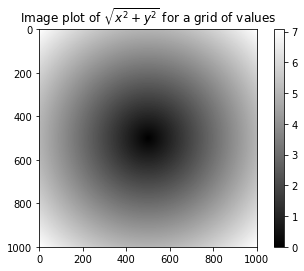

In [64]:
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
z
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [65]:
plt.draw()

### Expressing conditional logic as array operations

In [66]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [67]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [68]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

In [69]:
arr = randn(4, 4)
arr
np.where(arr > 0, 2, -2)
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-1.2915,  2.    ,  2.    ,  2.    ],
       [ 2.    , -0.5847,  2.    , -1.6896],
       [-0.6836,  2.    , -0.0356,  2.    ],
       [ 2.    ,  2.    ,  2.    , -0.3161]])

In [70]:
# Not to be executed

# result = []
# for i in range(n):
#     if cond1[i] and cond2[i]:
#         result.append(0)
#     elif cond1[i]:
#         result.append(1)
#     elif cond2[i]:
#         result.append(2)
#     else:
#         result.append(3)

In [71]:
# Not to be executed

# np.where(cond1 & cond2, 0,
#          np.where(cond1, 1,
#                   np.where(cond2, 2, 3)))

In [72]:
# Not to be executed

# result = 1 * cond1 + 2 * cond2 + 3 * -(cond1 | cond2)

### Mathematical and statistical methods

In [73]:
arr = np.random.randn(5, 4) # normally-distributed data
arr.mean()
np.mean(arr)
arr.sum()

4.2958594156828305

In [74]:
arr.mean(axis=1)


array([ 0.6443, -0.2354,  0.6   , -0.0054,  0.0704])

In [75]:
arr.sum(0)

array([-0.1979, -0.9036,  0.404 ,  4.9934])

In [76]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])


In [77]:
arr.cumsum(0)


array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [78]:
arr.cumprod(1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### Methods for boolean arrays

In [79]:
arr = randn(100)
(arr > 0).sum() # Number of positive values

47

In [80]:
bools = np.array([False, False, True, False])
bools.any()
bools.all()

False

### Sorting

In [81]:
arr = randn(8)
arr
arr.sort()
arr

array([-3.3376, -1.1448, -0.9372, -0.4165, -0.0654,  0.2836,  0.4339,
        1.5116])

In [82]:
arr = randn(5, 3)
arr
arr.sort(1)
arr

array([[-2.0266, -0.5008, -0.2564],
       [ 1.1689,  1.2575,  1.3311],
       [-2.6405, -1.4184, -0.083 ],
       [-0.9866, -0.1415,  0.3847],
       [-1.2326,  0.454 ,  0.7452]])

In [83]:
large_arr = randn(1000)
large_arr

array([ 0.5375, -0.5424, -0.2928, -0.1979, -2.7212, -0.8076, -0.7562,
       -0.3711,  0.8451, -1.3947,  1.3863,  0.6804,  0.1497, -0.0795,
       -1.2888, -0.0228, -0.5459, -0.6613, -0.2899, -1.221 ,  0.4811,
        0.9205, -1.3128, -0.6196, -0.3463,  0.2185,  0.1648, -0.2738,
        1.5634,  0.8761, -1.5223,  1.2251,  0.6016, -0.1004,  1.4518,
       -0.7813,  1.9514, -1.0221,  0.2706, -0.1471, -0.1233,  2.2061,
        0.5271, -0.8527, -0.634 ,  0.5008, -0.4755, -0.6775, -1.5977,
       -0.4192, -0.6439, -0.1957,  0.5057,  0.0952,  0.1096,  1.4729,
       -1.1775, -0.1833, -0.0419, -0.3633,  1.1385,  0.0462, -0.8975,
       -1.4567,  0.4822,  1.0649,  0.2276,  1.7459, -1.331 , -0.6214,
       -1.072 , -0.1449,  0.7865,  1.3026, -0.4106, -1.2711,  0.6629,
        1.0718, -1.4061, -1.1721, -0.5663, -0.2939, -0.3135,  1.2545,
        0.0317,  2.6284,  0.6699,  0.0677, -1.508 ,  1.8913,  1.1375,
        0.3416,  0.1101, -0.706 ,  0.5329,  0.3148, -1.3578,  0.6709,
       -0.3868,  1.0

In [84]:
large_arr.sort()
large_arr

array([-3.3319, -3.044 , -2.9521, -2.7212, -2.671 , -2.6132, -2.4848,
       -2.357 , -2.3521, -2.296 , -2.2941, -2.2702, -2.2248, -2.1841,
       -2.1772, -2.1437, -2.1142, -2.0759, -2.0711, -2.0198, -1.9771,
       -1.9267, -1.9188, -1.9172, -1.9112, -1.9063, -1.9033, -1.897 ,
       -1.8498, -1.8432, -1.8141, -1.8125, -1.8076, -1.7953, -1.7857,
       -1.7801, -1.7766, -1.7627, -1.7579, -1.7391, -1.7364, -1.7182,
       -1.7048, -1.6988, -1.6977, -1.6919, -1.6883, -1.6791, -1.6765,
       -1.6764, -1.6733, -1.666 , -1.6343, -1.6293, -1.6281, -1.6239,
       -1.6165, -1.609 , -1.6075, -1.601 , -1.5977, -1.594 , -1.5809,
       -1.5739, -1.5567, -1.5558, -1.5521, -1.5343, -1.5223, -1.508 ,
       -1.5074, -1.5   , -1.4999, -1.4997, -1.4903, -1.4879, -1.4747,
       -1.4709, -1.466 , -1.4567, -1.452 , -1.4262, -1.4242, -1.4193,
       -1.4176, -1.4061, -1.4014, -1.3974, -1.3947, -1.3883, -1.3832,
       -1.3761, -1.3578, -1.3553, -1.3536, -1.349 , -1.3459, -1.331 ,
       -1.3218, -1.3

In [85]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.6733279265858603

### Unique and other set logic

In [86]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [87]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [88]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## File input and output with arrays

### Storing arrays on disk in binary format

In [89]:
arr = np.arange(10)
np.save('some_array', arr)

In [90]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
np.savez('array_archive.npz', a=arr, b=arr)

In [92]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
!rm some_array.npy
!rm array_archive.npz

### Saving and loading text files

In [94]:
!cat ch04/array_ex.txt

0.580052,0.186730,1.040717,1.134411
0.194163,-0.636917,-0.938659,0.124094
-0.126410,0.268607,-0.695724,0.047428
-1.484413,0.004176,-0.744203,0.005487
2.302869,0.200131,1.670238,-1.881090
-0.193230,1.047233,0.482803,0.960334


In [95]:
arr = np.loadtxt('ch04/array_ex.txt', delimiter=',')
arr

array([[ 0.5801,  0.1867,  1.0407,  1.1344],
       [ 0.1942, -0.6369, -0.9387,  0.1241],
       [-0.1264,  0.2686, -0.6957,  0.0474],
       [-1.4844,  0.0042, -0.7442,  0.0055],
       [ 2.3029,  0.2001,  1.6702, -1.8811],
       [-0.1932,  1.0472,  0.4828,  0.9603]])

## Linear algebra

In [96]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])
x
y
x.dot(y)  # equivalently np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [97]:
np.ones(3).shape

(3,)

In [98]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [99]:
np.random.seed(12345)

In [100]:
from numpy.linalg import inv, qr
X = randn(5, 5)
mat = X.T.dot(X)
inv(mat)
mat.dot(inv(mat))
q, r = qr(mat)
r

array([[ -6.9271,   7.389 ,   6.1227,  -7.1163,  -4.9215],
       [  0.    ,  -3.9735,  -0.8671,   2.9747,  -5.7402],
       [  0.    ,   0.    , -10.2681,   1.8909,   1.6079],
       [  0.    ,   0.    ,   0.    ,  -1.2996,   3.3577],
       [  0.    ,   0.    ,   0.    ,   0.    ,   0.5571]])

## Random number generation

In [101]:
samples = np.random.normal(size=(4, 4))
samples

array([[ 0.1241,  0.3026,  0.5238,  0.0009],
       [ 1.3438, -0.7135, -0.8312, -2.3702],
       [-1.8608, -0.8608,  0.5601, -1.2659],
       [ 0.1198, -1.0635,  0.3329, -2.3594]])

In [102]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]
%timeit np.random.normal(size=N)

1 loop, best of 3: 761 ms per loop
10 loops, best of 3: 31.9 ms per loop


## Example: Random Walks

In [103]:
np.random.seed(12345)

In [104]:
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

In [105]:
walk.min()
walk.max()

31

In [106]:
(np.abs(walk) >= 10).argmax()

37

### Simulating many random walks at once

In [107]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   0,   1, ...,   8,   7,   8],
       [  1,   0,  -1, ...,  34,  33,  32],
       [  1,   0,  -1, ...,   4,   5,   4],
       ..., 
       [  1,   2,   1, ...,  24,  25,  26],
       [  1,   2,   3, ...,  14,  13,  14],
       [ -1,  -2,  -3, ..., -24, -23, -22]])

In [108]:
walks.max()
walks.min()

-133

In [109]:
hits30 = (np.abs(walks) >= 30).any(1)
hits30
hits30.sum() # Number that hit 30 or -30

3410

In [110]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(1)
crossing_times.mean()

498.88973607038122

In [112]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nwalks, nsteps))
steps

array([[-0.3268,  0.1249,  0.2698, ...,  0.2671,  0.3036,  0.0779],
       [ 0.2366,  0.0655,  0.1936, ..., -0.251 , -0.0439,  0.0255],
       [ 0.0384, -0.1557, -0.6306, ...,  0.1593, -0.0233, -0.0209],
       ..., 
       [ 0.1408, -0.2996, -0.2905, ..., -0.2326,  0.2259,  0.4995],
       [ 0.0357,  0.3178,  0.0168, ...,  0.2528, -0.0408,  0.128 ],
       [-0.0295,  0.3166,  0.1969, ...,  0.3855,  0.2227,  0.2535]])